In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)

# **Loading The Data set**

In [251]:
data = pd.read_csv('/BreastCancerDataset.csv')

# **Data Visualisation & Exploring**

In [252]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [254]:
print(data.var())

id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.241674e+05


In [255]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)

# **The Heatmap For Exploring The Relations Between The Cancer Features**

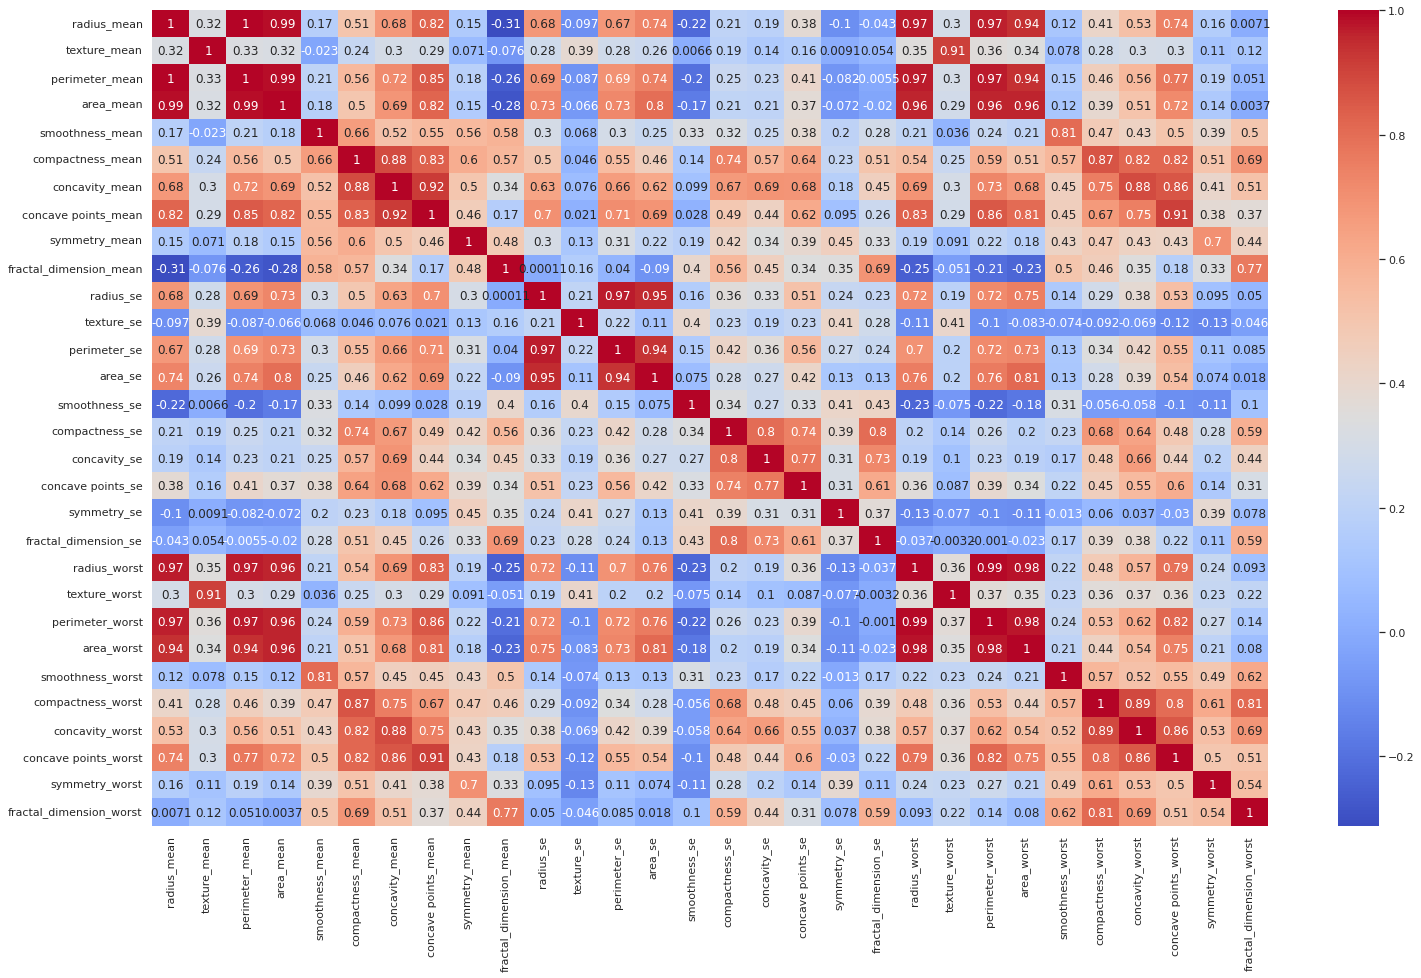

In [256]:
corr = data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


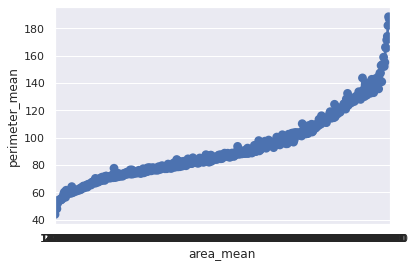

In [257]:
sns.pointplot(data['area_mean'], data['perimeter_mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


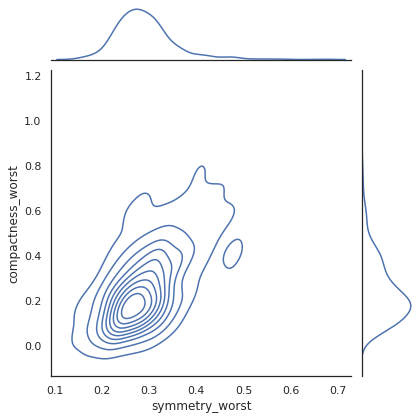

In [258]:
with sns.axes_style('white'):
    sns.jointplot("symmetry_worst", "compactness_worst", data, kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


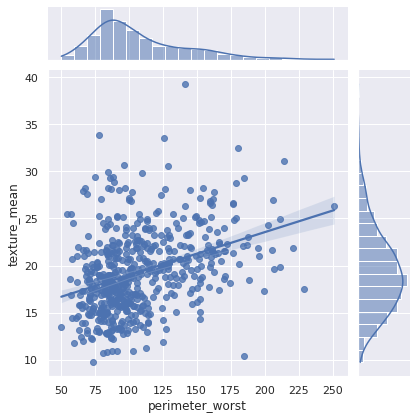

In [259]:
sns.jointplot("perimeter_worst", "texture_mean", data=data, kind='reg');

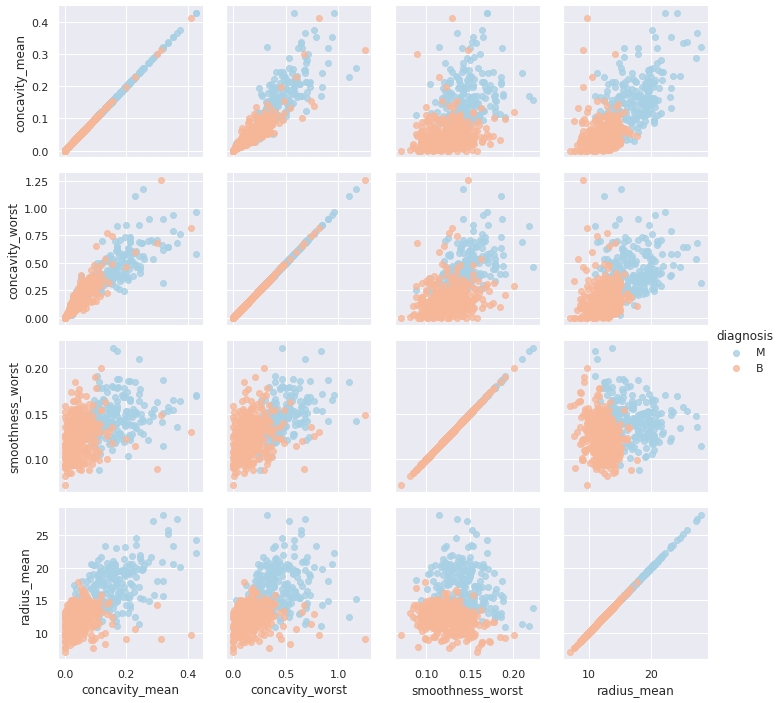

In [260]:
g = sns.PairGrid(data, vars=['concavity_mean', 'concavity_worst', 'smoothness_worst', 'radius_mean'],
                 hue='diagnosis', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# **Splitting The Data set to Training Part and Validation Part**

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [262]:
data['diagnosis']= data['diagnosis'].replace('M', 1)
data['diagnosis']= data['diagnosis'].replace('B', 0)

In [263]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 30% of The Dataset Will Be Used For Testing

# Choosing The Features With The Highest Variance - Approach 
***To Train The Model***

In [265]:
data = data[['diagnosis', 'area_mean','concavity_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'texture_mean', 'area_se', 'texture_worst', 'smoothness_worst']]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


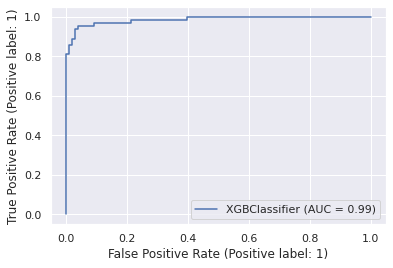

In [266]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
prediction_xgb = xgb.predict(x_test)
print(classification_report(y_test, prediction_xgb))
metrics.plot_roc_curve(xgb, x_test, y_test)